#                    # Glass Identification Project

# Project Description

The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence.if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


# Loading the required libaries

In [2]:


# data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

# Data Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading the csv files and listing the datas
df_glass = pd.read_csv(r"C:\Users\Premium\Downloads\glass.csv")
df_glass.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [5]:
df_glass.shape

(214, 10)

In [6]:
df_glass.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
149,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.00,0.00,3
125,1.51872,12.93,3.66,1.56,72.51,0.58,8.55,0.00,0.12,2
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00,6


In [7]:
df_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
## There are no null values and all the values seem to be numerical.

# Descriptive Statistics

In [9]:
df_glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#The features are not on the same scale. For example Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression.

In [10]:
df_glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [11]:
## The  type 1 and 2 occupies more than 70% when comparied with other glass types

# Exploratory Data Analysis

In [13]:
# now we can check the plot for distribution of types.

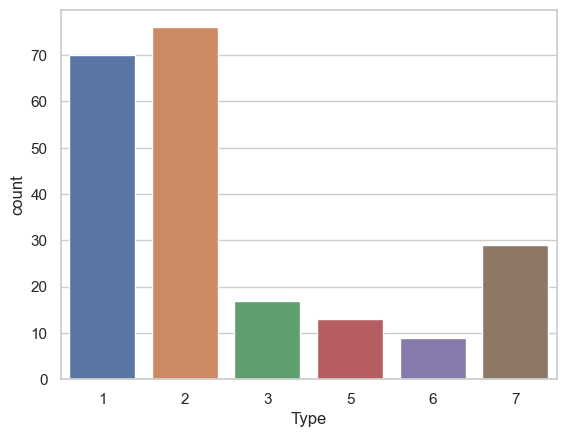

In [12]:
sns.countplot(df_glass['Type'])
plt.show()

From the type distribition analysis we can say that Type 1 and 2 have the highest occurences in the dataset.Since The dataset source is in the crime scene the reason of the high count of type 1 and 2 is that many criminals break through building window glasses at the scene rather than breaking containers or tableware.

# Data visualization

Univariate plots

In [41]:
attributes = df_glass.columns[:-1].tolist()
print(attributes)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


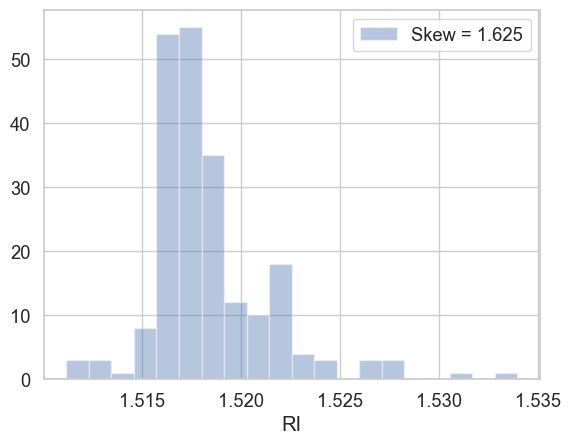

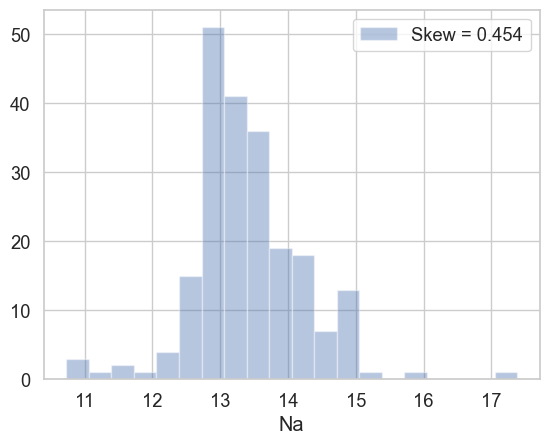

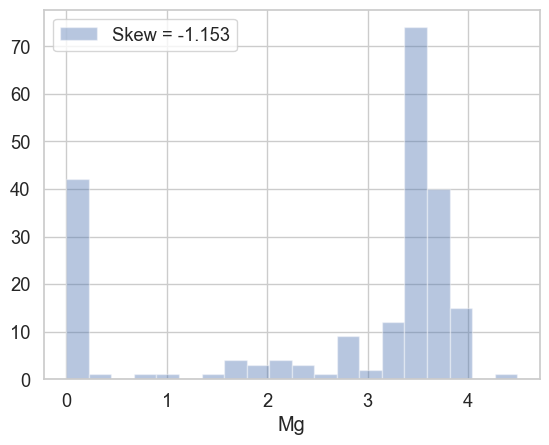

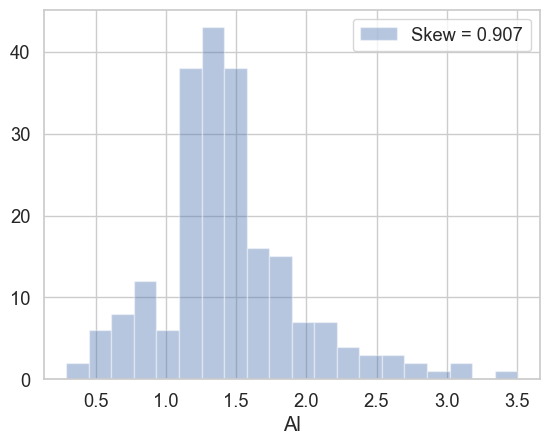

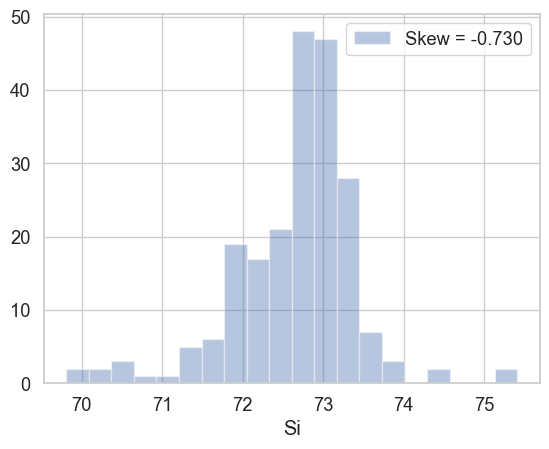

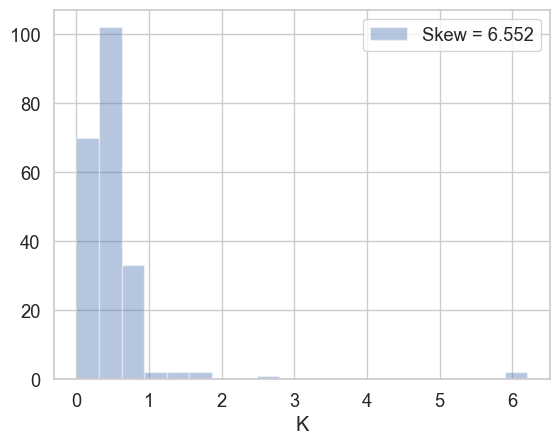

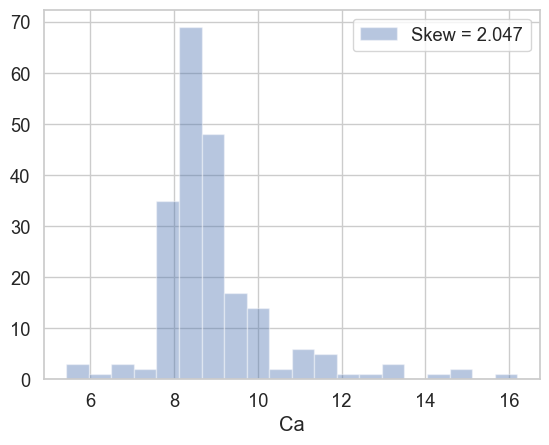

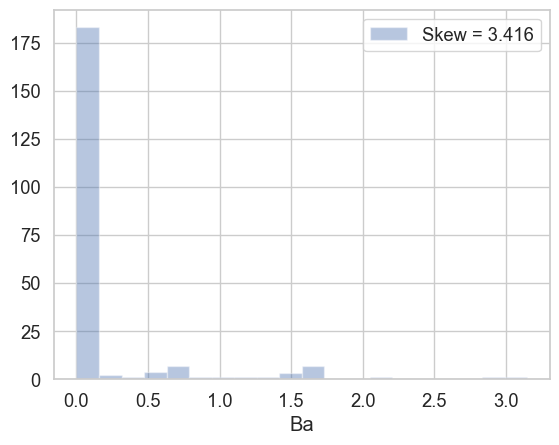

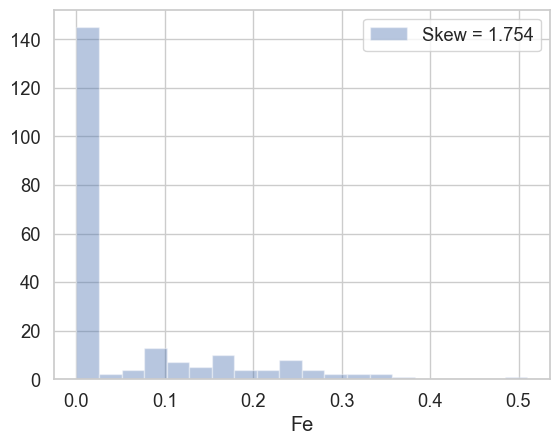

In [43]:
for i in attributes:
    skew = df_glass[i].skew()
    sns.distplot(df_glass[i], kde= False, label='Skew = %.3f' %(skew), bins=20)
    plt.legend(loc='best')
    plt.show()

None of the attributes are normally distributed.
Fe,Ba,Ca and k has highest skew coefficients.
K and Ba seem to have many outliers.
Lets identify indices of observations contaning outliers using Boxplotting.

# Box plotting

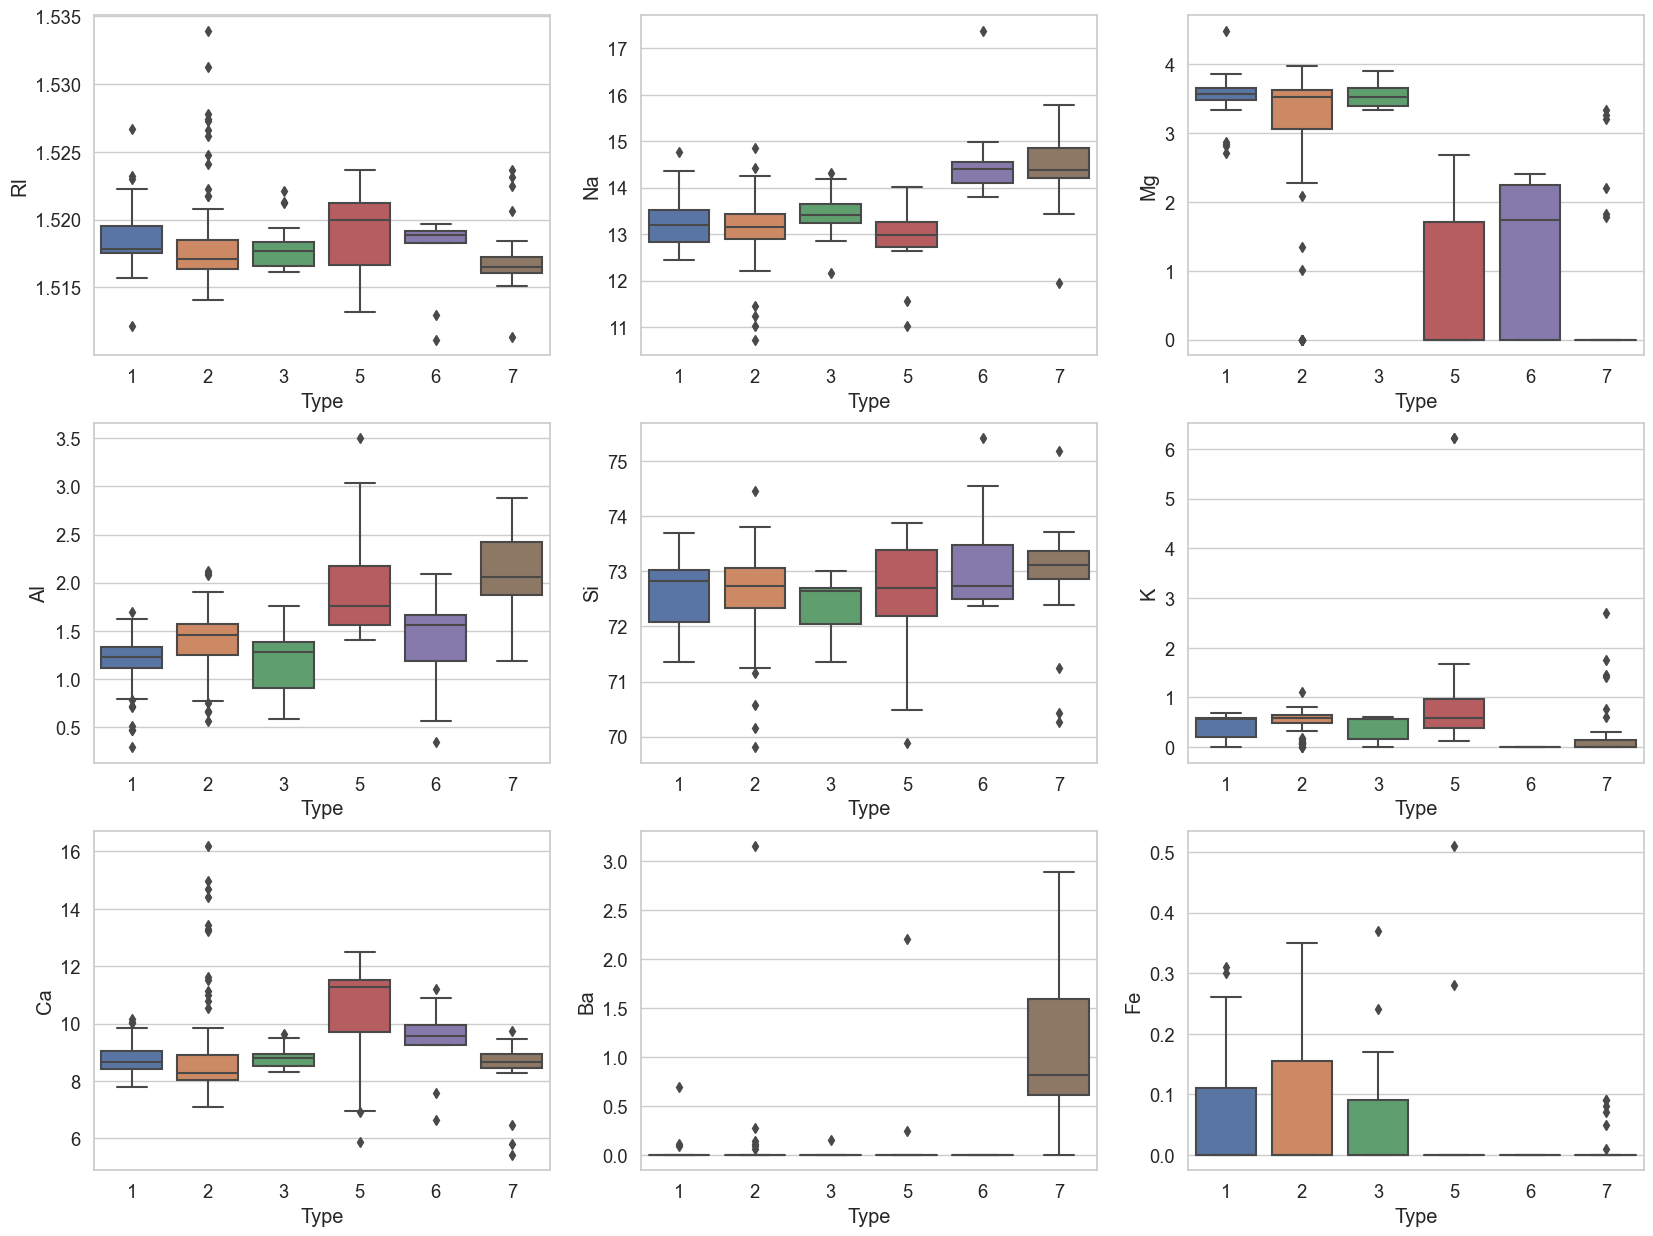

In [44]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=df_glass)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=df_glass)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=df_glass)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=df_glass)
plt.subplot(3,3,5)
sns.boxplot(x='Type' , y='Si', data=df_glass)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=df_glass)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=df_glass)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=df_glass)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=df_glass)
plt.show()

In [45]:
#The box plot shows that average Refractive index is similar for all types.
#Type 5 has a wider range and slightly higher mean. 
#Sodium content is higher in Type 6 and 7, whereas Magnesium content is fairly high in Type 1, 2 & 3.
#Aluminium is higher in type 5 and 7.
#Silica does not provide much information to differentiate as it has the highest concentration amongst all the minerals but has similar range for all types. 
#Potassium also doesn't provide much insight. But it's higher in type 5, containers, because K is used in toughened glass which are used to make pyrex items.
#Calcium is highest in type 5 and Barium in type 7. 
#Iron is present in extremely low concentration, yet type 1, 2 & 3 have high values for some glasses than the rest.This is because Iron is added mainly in colored glasses.

# The dimond shaped dots outside the boxplot indicates the outliers.there are some exteme cases in K,Ba and Fe and so it is important to ruleout these outliers.

# Pair plot

Pairplot is done to visually examine the corerelation between the features.

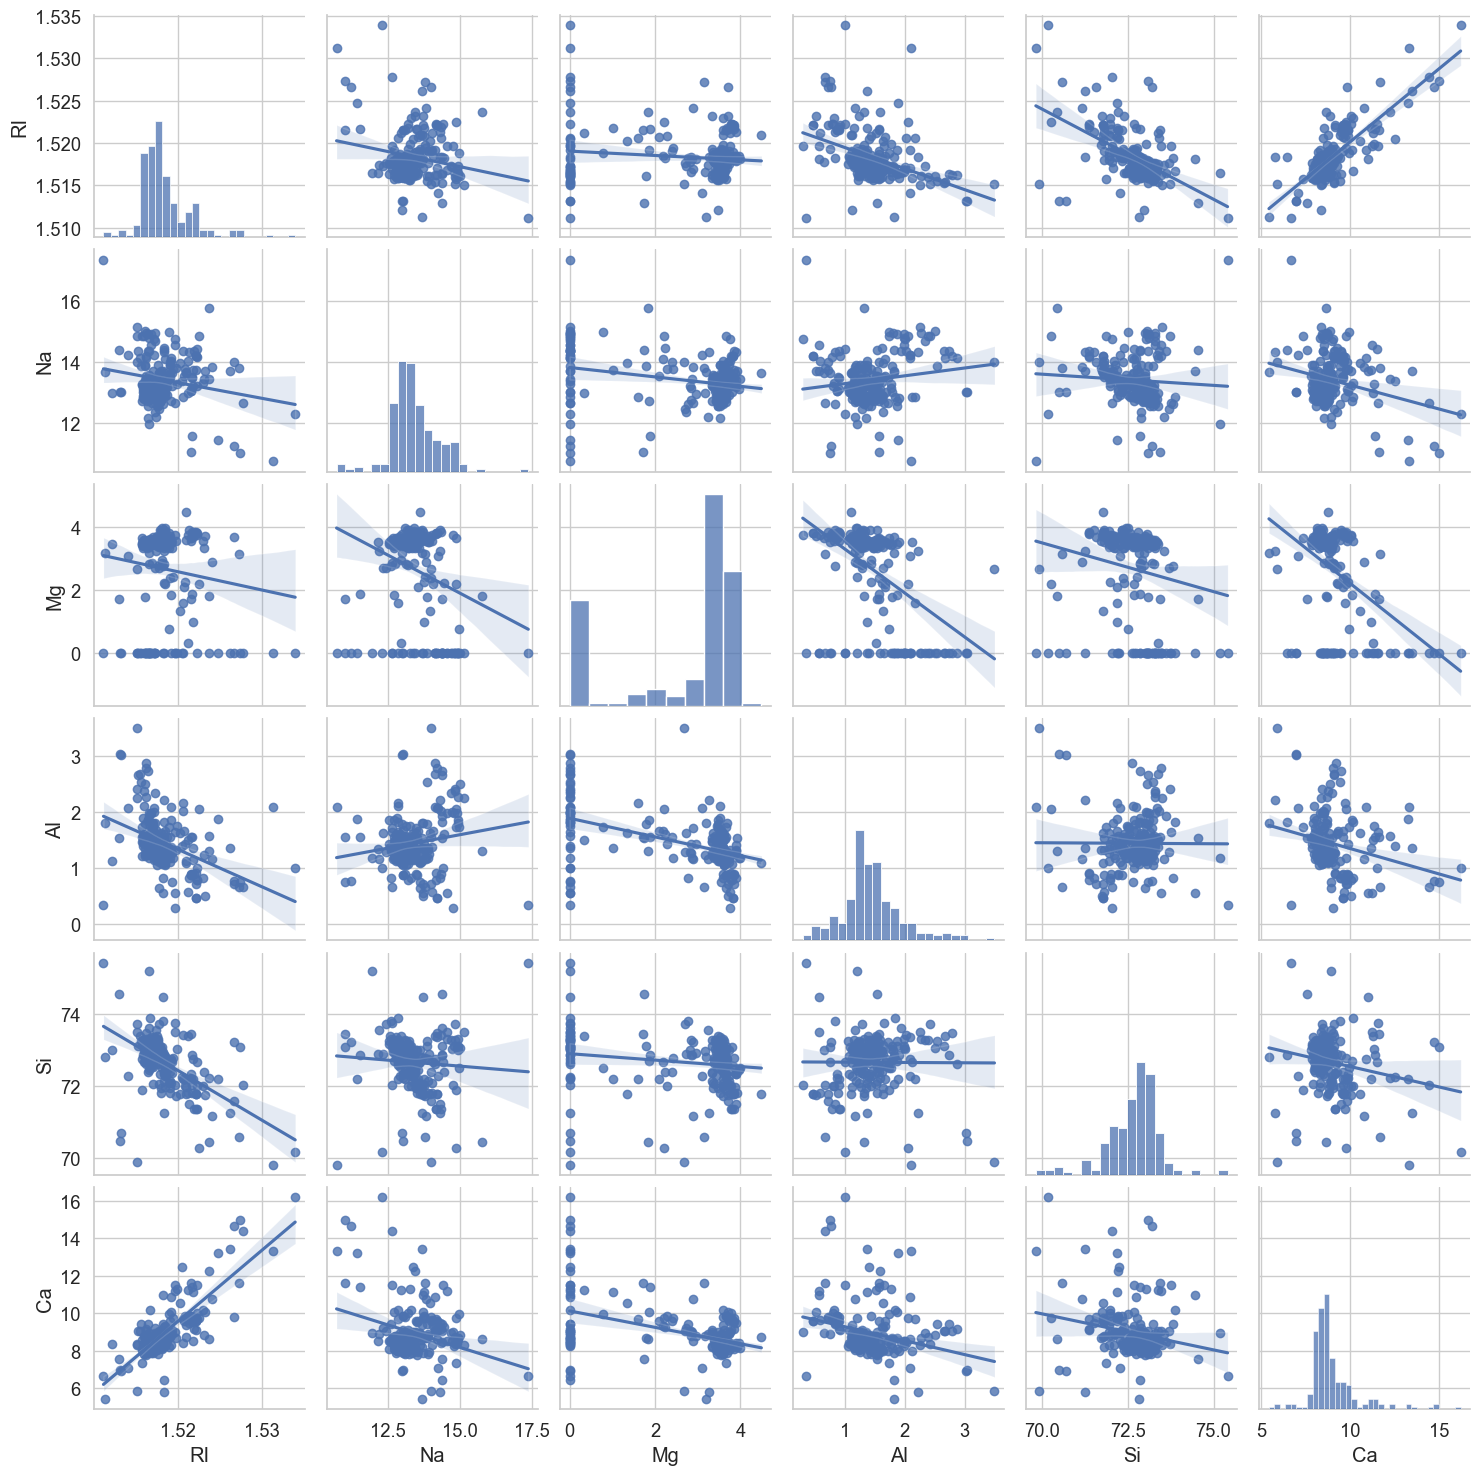

In [24]:
sns.pairplot(df_glass[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

The points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index. Silica and RI seem to have an inverse relationship.

# Scatter plots

<AxesSubplot:xlabel='RI', ylabel='Na'>

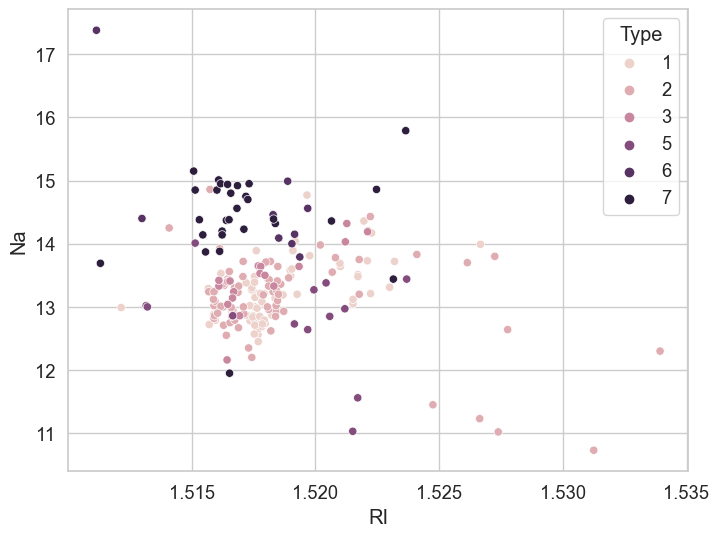

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RI',y='Na',hue='Type',data=df_glass)

From this we can know that Na is an important feature for glass type.and RI distribution doesnt provide much insight.

<AxesSubplot:xlabel='Mg', ylabel='Al'>

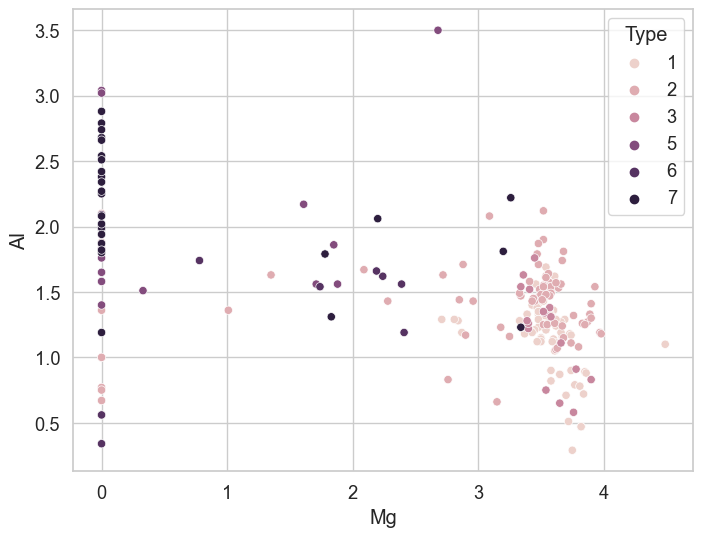

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Mg',y='Al',hue='Type',data=df_glass)

Higher Glass type have lower levels of mg

<AxesSubplot:xlabel='Al', ylabel='Ca'>

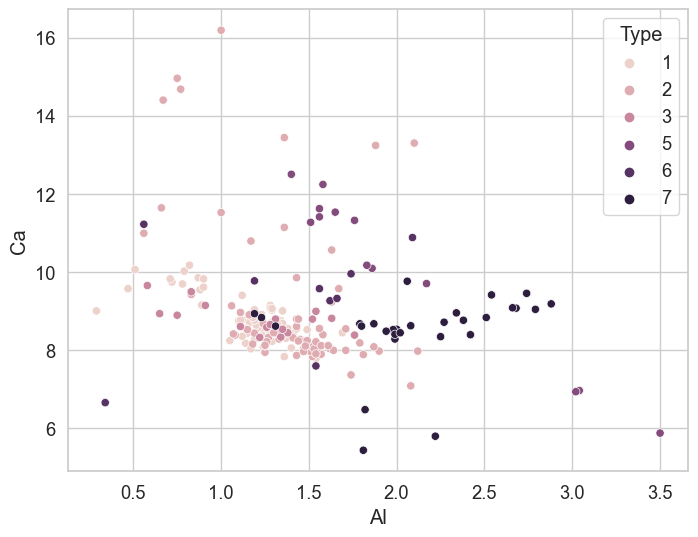

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Al',y='Ca',hue='Type',data=df_glass)

Here we can see that Al plays a vital role in decicding the glass type

<AxesSubplot:xlabel='Si', ylabel='K'>

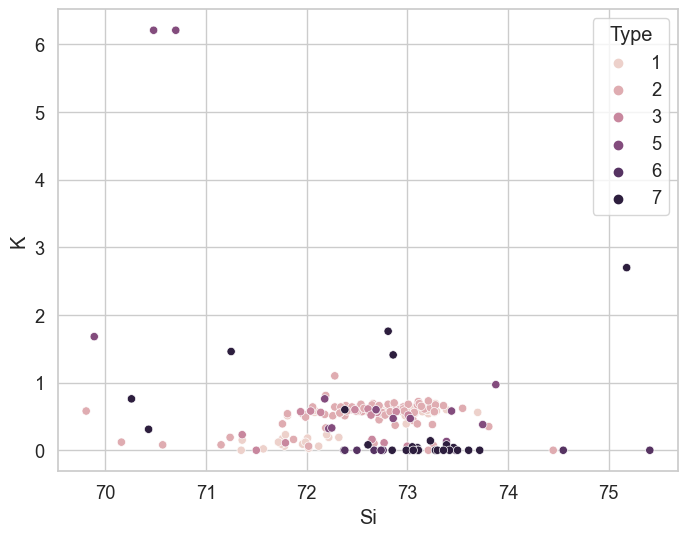

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Si',y='K',hue='Type',data=df_glass)

Si is of moderate importance in deciding glass type.
All types of glass have lower values of K.

# Observation Using Correlation

In [33]:
corr = df_glass.corr() 
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


Na, Al, Mg and Ba does helps in identifying glass types.
K, Ca does not provide much insight into glass types.

# Let us plot a correlation heatmap to identify multicollinearity

<AxesSubplot:>

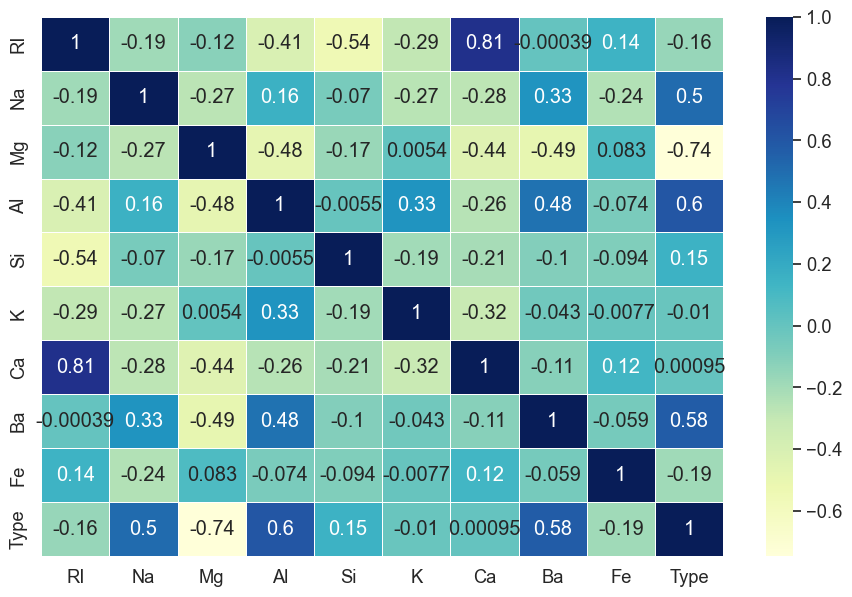

In [35]:
plt.subplots(figsize=(11,7))
sns.heatmap(df_glass.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

As seen in the pairplot, RI and Ca have a high positive correlation, and Si and RI, negative.
since this is a classification technique and not regression, we cannot simply remove the collinear variables from the model, as they might be able to explain the difference between the target labels.

# Principal component analysis

 Principal component analysis is used to decide on the candidate variables. This is valuable as it can help in dimension reduction and lower the cost of data collection.

In [37]:
from sklearn.decomposition import PCA  # importing the req lib

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


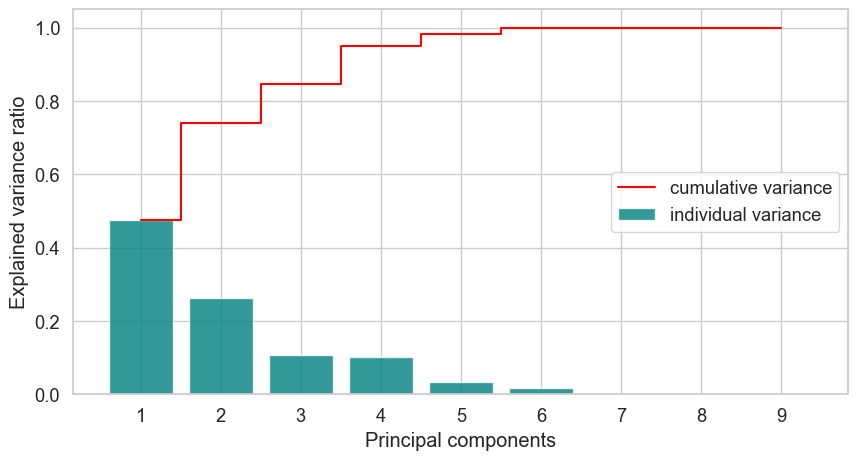

In [39]:
# Performing PCA
X_var =df_glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(10,5))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

The first 5 variables account for about 99% of the total explained variance. We can run the analysis again only with these five variables.

In [56]:
from sklearn.decomposition import PCA
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [57]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [60]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

we have our features and target labels, let us proceed to model development.

# Model Development

In [61]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = df_glass["Type"].values

In [62]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


# Testing with various Machine Learning Models

In [64]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

# XGBoost CLassifier
#xgbMod = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
#xgbMod.fit(X_train,y_train)
#y_pred = xgbMod.predict(X_test)
#sc2 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)

In [67]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
#print(svmMod.feature_importances_)
print(gbmMod.feature_importances_)

[0.18687119 0.34090647 0.1400413  0.26050905 0.07167199]
[0.31377335 0.32296928 0.05489302 0.21178263 0.09658172]
[0.3352154  0.28779865 0.13393196 0.17160844 0.07144555]


In [69]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc3],
                             ['Decision Tree',sc4],['Random Forest',sc5]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.753846
1,Gradient Boost,0.676923
2,Decision Tree,0.646154
3,Random Forest,0.738462


SVM gives the highest accuracy and all the features seem to be important from the other models. So, we will retain SVM as our final model and perform hyperparameter tuning to improve it.

# Hyperparameter tuning

In [70]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


# Running final model and prediction results.

In [71]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.6923076923076923

# Model Performance

Text(270.25, 0.5, 'predicted label')

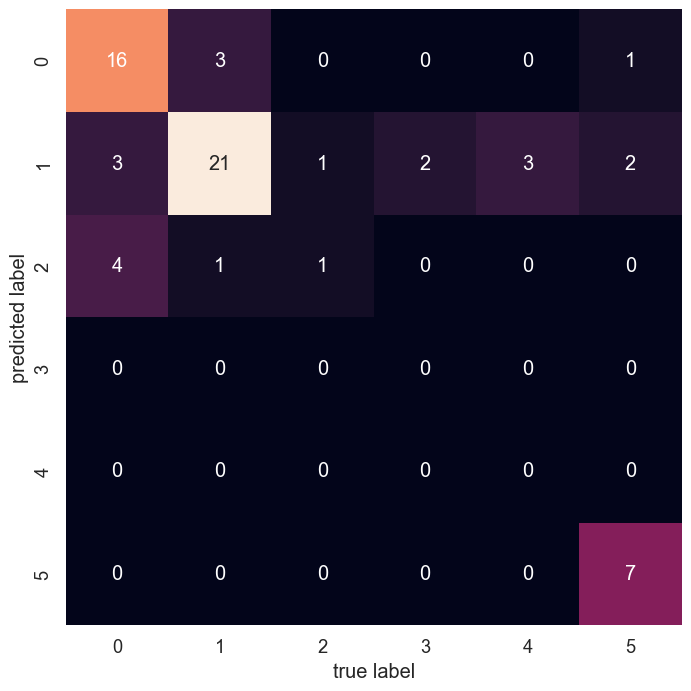

In [72]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.70      0.74        23
           2       0.66      0.84      0.74        25
           3       0.17      0.50      0.25         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       1.00      0.70      0.82        10

    accuracy                           0.69        65
   macro avg       0.44      0.46      0.43        65
weighted avg       0.69      0.69      0.68        65



# Conclusion


We see that overall model identifies most of the glass types correctly - type 1,2, 5 and 7,